     post_type       likes    comments      shares  total_engagement  \
0  educational  456.566667  236.966667   95.266667        788.800000   
1  interactive  524.272727  226.363636   90.818182        841.454545   
2  promotional  479.351351  263.702703  109.351351        852.405405   

   engagement_rate  
0         3.368734  
1         2.540103  
2         3.427241  


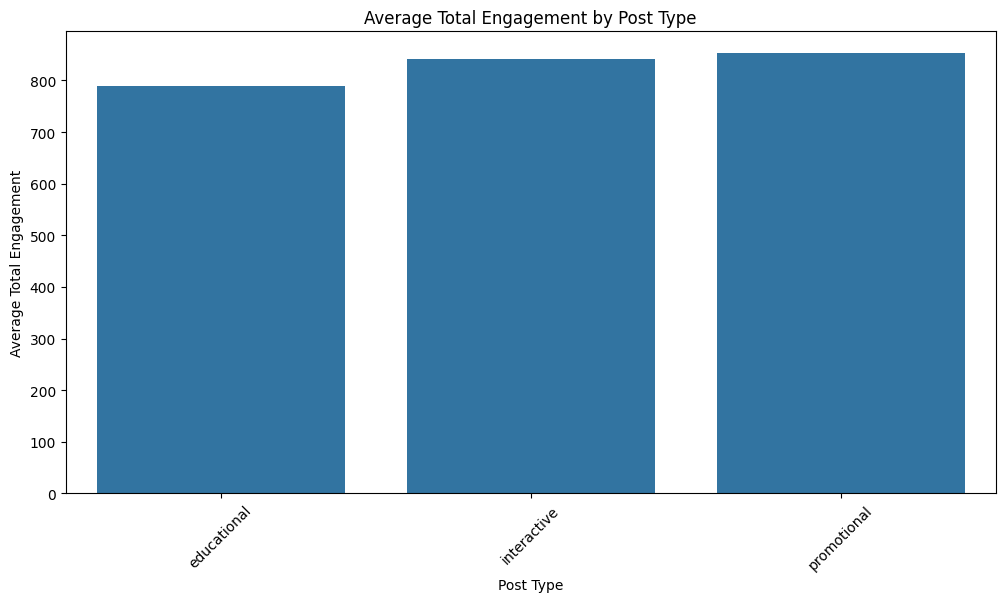

The best performing content type is 'promotional' with an average engagement of 852.41.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Exp 2 Dataset(1).csv')

# Calculate engagement metrics
data['total_engagement'] = data['likes'] + data['comments'] + data['shares']
data['engagement_rate'] = data['total_engagement'] / (data['likes'] + 1)  # Avoid division by zero

# Group by post type and calculate average engagement metrics
engagement_summary = data.groupby('post_type').agg({
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'total_engagement': 'mean',
    'engagement_rate': 'mean'
}).reset_index()

# Print the engagement summary
print(engagement_summary)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='post_type', y='total_engagement', data=engagement_summary)
plt.title('Average Total Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Total Engagement')
plt.xticks(rotation=45)
plt.show()

# Recommendations based on analysis
best_performing_type = engagement_summary.loc[engagement_summary['total_engagement'].idxmax()]
print(f"The best performing content type is '{best_performing_type['post_type']}' with an average engagement of {best_performing_type['total_engagement']:.2f}.")